In [1]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

# Задание 1:

Придумайте матрицы, которые обладают следующими свойствами:

a) диагональная, ортогональная, но не единичная(!):

b) верхнетреугольная, ортогональная:

c) нижнетреугольная, ортогональная: 

d) матрица, у которой определитель = 1, и все элементы не равны 0:

e) матрица (3x3), у которой определитель = 1:

In [3]:
#а) диагональная, ортогональная, но не единичная(!):

m1a = np.array([[-1, 0], [0, 1]])
print('диагональная, ортогональная, но не единичная матрица:\n', m1a)
print('проверка (перемножение):\n',np.dot(m1a, m1a.T))

диагональная, ортогональная, но не единичная матрица:
 [[-1  0]
 [ 0  1]]
проверка (перемножение):
 [[1 0]
 [0 1]]


In [4]:
# b) верхнетреугольная, ортогональная:

m1b = np.array([[-1,3], [0, 1]])
print('верхнетреугольная матрица:\n', m1b)

верхнетреугольная матрица:
 [[-1  3]
 [ 0  1]]


In [5]:
# c) нижнетреугольная, ортогональная: 

m1с = np.array([[-1,0], [3, 1]])
print('нижнетреугольная матрица:\n', m1с)

нижнетреугольная матрица:
 [[-1  0]
 [ 3  1]]


In [6]:
# d) матрица, у которой определитель = 1, и все элементы не равны 0:

m1d = np.array([[1,2], [1, 3]])
print('матрица, у которой определитель = 1, и все элементы не равны 0:\n', m1d)
print('определитель матрицы: {}'.format(np.linalg.det(m1d)))

матрица, у которой определитель = 1, и все элементы не равны 0:
 [[1 2]
 [1 3]]
определитель матрицы: 1.0


In [9]:
# e) матрица (3x3), у которой определитель = 1:

m1e = np.array([[2,1,1],[1,1,2], [1,1,3]])
print('матрица (3x3), у которой определитель = 1:\n', m1e)
print('определитель матрицы: {}'.format(np.linalg.det(m1e)))

матрица (3x3), у которой определитель = 1:
 [[2 1 1]
 [1 1 2]
 [1 1 3]]
определитель матрицы: 1.0


P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

# Задание 2:

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и честное решение на бумаге:)

In [11]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


D=X**2 - 5X + 4

X1=1, X2=4

In [12]:
w, v = np.linalg.eig((m))
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[i]))

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719 -0.70710678]
Собственное значение 4.0
соответствующий ему собственный вектор [ 0.4472136  -0.70710678]


Для данного примера в честном решении можно "угадать" корни многочлена 3-ей степени, посмотрев на решение на numpy

In [13]:
m = np.array([[4, 1, -1],
              [1, 4, -1],
              [-1, -1, 4]])
print(m)

[[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]


Если разложить матрицу, то получим: $(4 - x - 1)((4 - x)^2 + (4 - x) - 2) = 0$

откуда: $(4 - x - 1) = 0$ => $x = 3 $

$(4 - x)^2 + (4 - x) - 2 = 0$ => $x1 = 3, x2 = 6$

# Задание 3:

Найдите спектральное разложение матрицы (честное решение на бумаге и на numpy)

In [17]:
m = np.array([[1, 2],
              [2,3]])
print(m)

[[1 2]
 [2 3]]


In [14]:
a, U = linalg.eig(m)
print('Eigenvalues:')
print(a)
print('\nEigenvectors:')
print(U)

Eigenvalues:
[1.+0.j 4.+0.j]

Eigenvectors:
[[-0.89 -0.71]
 [0.45 -0.71]]


In [15]:
print(U * np.diag(a) * U.T)

[[ 0.8-0.j -0. +0.j]
 [-0. +0.j  2. -0.j]]


# Задание 4:

Для примера из лекции постройте график зависимости oob_score RandomForestClassifier от количества компонент при сжатии с помощью SVD

In [16]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [17]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [18]:
X, y = load_digits(return_X_y=True)

In [19]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


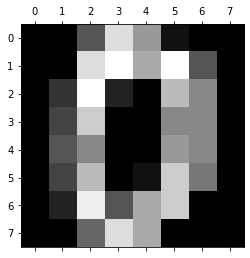

In [20]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [21]:
svd = TruncatedSVD(n_components=5)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.5152668966890254

In [22]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.7907623817473567

In [23]:
res = []
max_oob = 50
for i in range(2,max_oob):
    svd = TruncatedSVD(n_components=5)
    X_reduced = svd.fit_transform(X)
    rf_reduced = RandomForestClassifier(oob_score=True)
    rf_reduced.fit(X_reduced, y)
    res.append(rf_reduced.oob_score_)

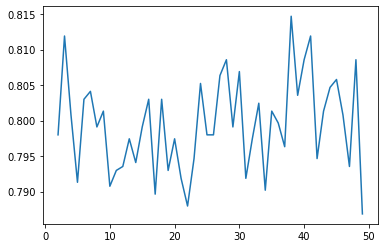

In [24]:
plt.plot(range(2,max_oob), res)